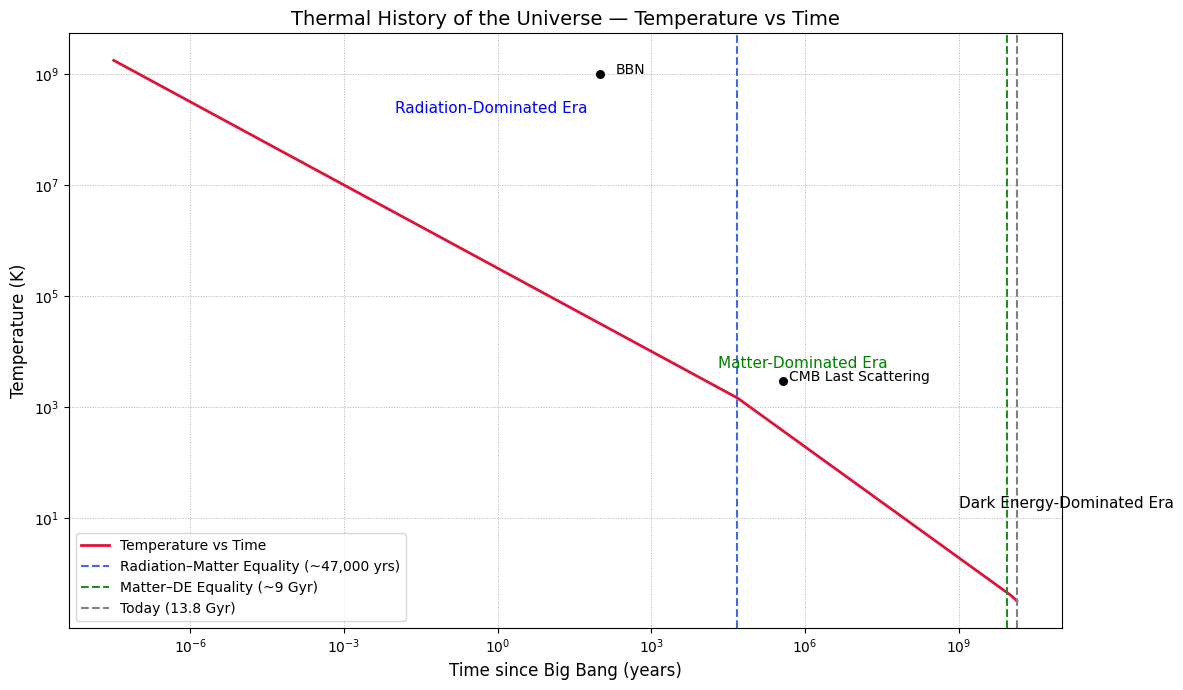

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
year = 3.154e+7  # seconds in a year
t_r_end = 4.7e4 * year
t_m_end = 9e9 * year
t_now = 13.8e9 * year
T0 = 2.725  # K

# Time array (in seconds, logspace)
t_vals = np.logspace(0, np.log10(t_now), 1000)
T_vals = np.zeros_like(t_vals)

# Hubble const approx (s^-1)
H_de = 1 / t_now

# Piecewise T(t)
for i, t in enumerate(t_vals):
    if t < t_r_end:
        T_vals[i] = T0 * (t / t_now) ** (-1/2)
    elif t < t_m_end:
        T_r_end_val = T0 * (t_r_end / t_now) ** (-1/2)
        T_vals[i] = T_r_end_val * (t / t_r_end) ** (-2/3)
    else:
        T_m_end_val = T0 * (t_r_end / t_now) ** (-1/2) * (t_m_end / t_r_end) ** (-2/3)
        T_vals[i] = T_m_end_val * np.exp(-H_de * (t - t_m_end))

# Plot
plt.figure(figsize=(12, 7))
plt.loglog(t_vals / year, T_vals, label='Temperature vs Time', color='crimson', linewidth=2)

# Era transition lines
plt.axvline(t_r_end / year, linestyle='--', color='royalblue', linewidth=1.5, label='Radiation–Matter Equality (~47,000 yrs)')
plt.axvline(t_m_end / year, linestyle='--', color='forestgreen', linewidth=1.5, label='Matter–DE Equality (~9 Gyr)')
plt.axvline(t_now / year, linestyle='--', color='gray', linewidth=1.5, label='Today (13.8 Gyr)')

# Label eras
plt.text(1e-2, 2e8, 'Radiation-Dominated Era', fontsize=11, color='blue')
plt.text(2e4, 5e3, 'Matter-Dominated Era', fontsize=11, color='green')
plt.text(1e9, 15, 'Dark Energy-Dominated Era', fontsize=11, color='black')

# Cosmic events (optional annotations)
plt.scatter(1e2, 1e9, color='black', s=30, zorder=5)
plt.text(2e2, 1e9, 'BBN', fontsize=10)

plt.scatter(3.8e5, 3000, color='black', s=30, zorder=5)
plt.text(5e5, 3000, 'CMB Last Scattering', fontsize=10)

# Labels and styling
plt.xlabel('Time since Big Bang (years)', fontsize=12)
plt.ylabel('Temperature (K)', fontsize=12)
plt.title('Thermal History of the Universe — Temperature vs Time', fontsize=14)
plt.grid(True, which="both", linestyle=':', linewidth=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
